In [28]:
import os
import pandas as pd
import numpy as np

import utils

In [29]:
pwd = os.getcwd()
print(os.listdir(pwd))

['.ipynb_checkpoints', 'app.py', 'data', 'environment.yml', 'model.h5', 'model.ipynb', 'model.keras', 'preprocessed_data.csv', 'requirements.txt', 'text_preprocessing.ipynb', 'tokenizer.pkl', 'utils.py', '__pycache__']


In [30]:
path = os.path.join(pwd, 'data')

In [31]:
df = pd.read_csv(path+"\\text.csv", index_col=0)


In [12]:
df.head()

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


## Data Visualization

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
plt.style.use('bmh')

In [35]:
sentiment_mapping = {
    0: 'sadness',
    1: 'joy',
    2: 'love',
    3: 'anger',
    4: 'fear',
    5: 'surprise'
}

df['sentiments'] = df['label'].map(sentiment_mapping)

Text(0.5, 0, 'Sentiments')

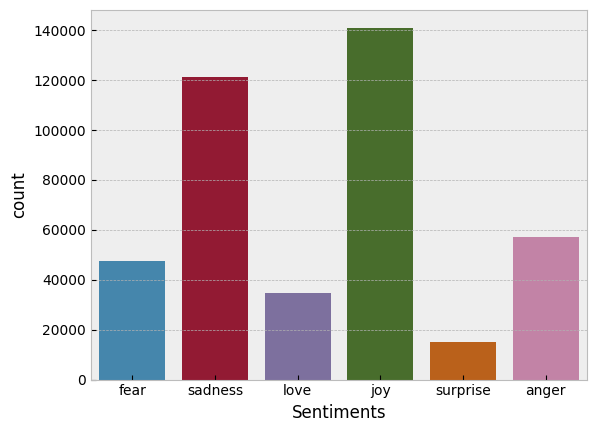

In [36]:
sns.countplot(x='sentiments', data=df, hue='sentiments')

plt.xlabel('Sentiments')

In [37]:
#Firstly we are going to see if we have a balanced dataset
def percentage(cnt_of_sentiment, cnt_all, sentiment):
    count = cnt_of_sentiment/cnt_all * 100
    print(f'THe percentage of text labeled as {sentiment} is {round(count,2)}%')

count_sadness = len(df[df['label']==0])
count_joy = len(df[df['label']==1])
count_love = len(df[df['label']==2])
count_anger = len(df[df['label']==3])
count_fear= len(df[df['label']==4])
count_surprise= len(df[df['label']==5])

percentage(count_sadness, len(df), 'sadness')
percentage(count_joy, len(df), 'joy')
percentage(count_love, len(df), 'love')
percentage(count_anger, len(df), 'anger')
percentage(count_fear, len(df), 'fear')
percentage(count_surprise, len(df), 'surprise')

THe percentage of text labeled as sadness is 29.07%
THe percentage of text labeled as joy is 33.84%
THe percentage of text labeled as love is 8.29%
THe percentage of text labeled as anger is 13.75%
THe percentage of text labeled as fear is 11.45%
THe percentage of text labeled as surprise is 3.59%


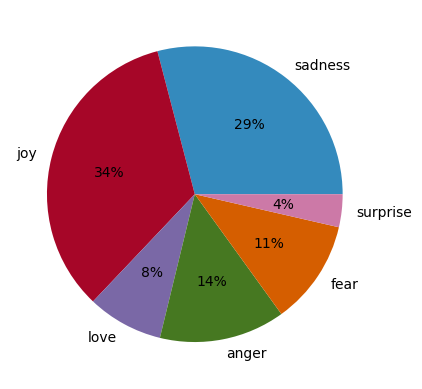

In [38]:
data = [29.07, 33.84, 8.29, 13.75, 11.45, 3.59]
labels = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

plt.pie(data, labels=labels, autopct='%.0f%%')
plt.show()

Text(0.5, 0, 'Length of text')

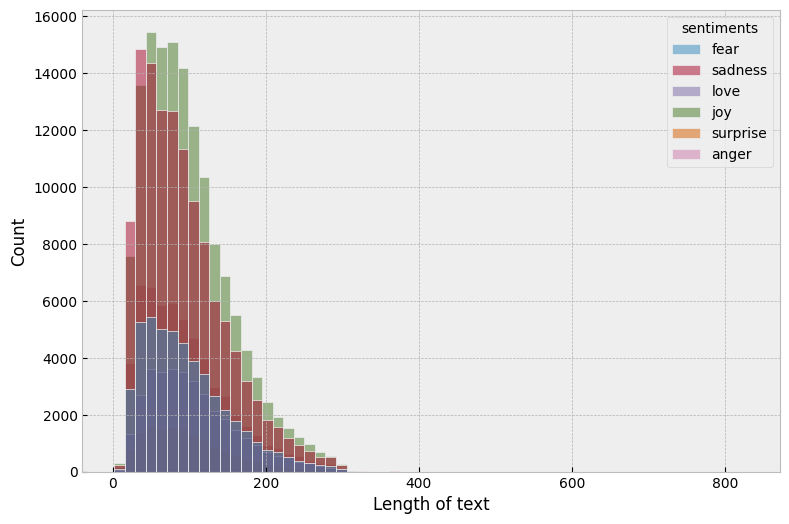

In [39]:
df['text_length'] = df['text'].apply(len)

plt.figure(figsize=(9,6))

sns.histplot(data=df, x='text_length', hue='sentiments', bins=60)
plt.xlabel('Length of text')

From the above graph we can come to different conclusions:

- The minimum length of text is around 7 characters and the maximum length of text is around 300 characters.
- The biggest concentration of text are around 50 to 130 characters.

### Wordcloud visualization

In [40]:
from wordcloud import WordCloud

In [41]:
#Firstly, we are going to create separate datasets to use for the visualization
def create_dataframe(df, sentiment):
    df = df[df['sentiments']==sentiment]
    return df


df_sadness = create_dataframe(df, 'sadness')
df_anger = create_dataframe(df, 'anger')
df_joy = create_dataframe(df, 'joy')
df_fear = create_dataframe(df, 'fear')
df_love = create_dataframe(df, 'love')
df_surprise = create_dataframe(df, 'surprise')

In [42]:
def combined_text(df):
    text = ' '.join(df['text'])
    return text

sadness_text = combined_text(df_sadness)
anger_text = combined_text(df_anger)
joy_text = combined_text(df_joy)
fear_text = combined_text(df_fear)
love_text = combined_text(df_love)
surprise_text = combined_text(df_surprise)

sadness_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sadness_text)
anger_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(anger_text)
joy_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(joy_text)
fear_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(fear_text)
love_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(love_text)
surprise_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(surprise_text)

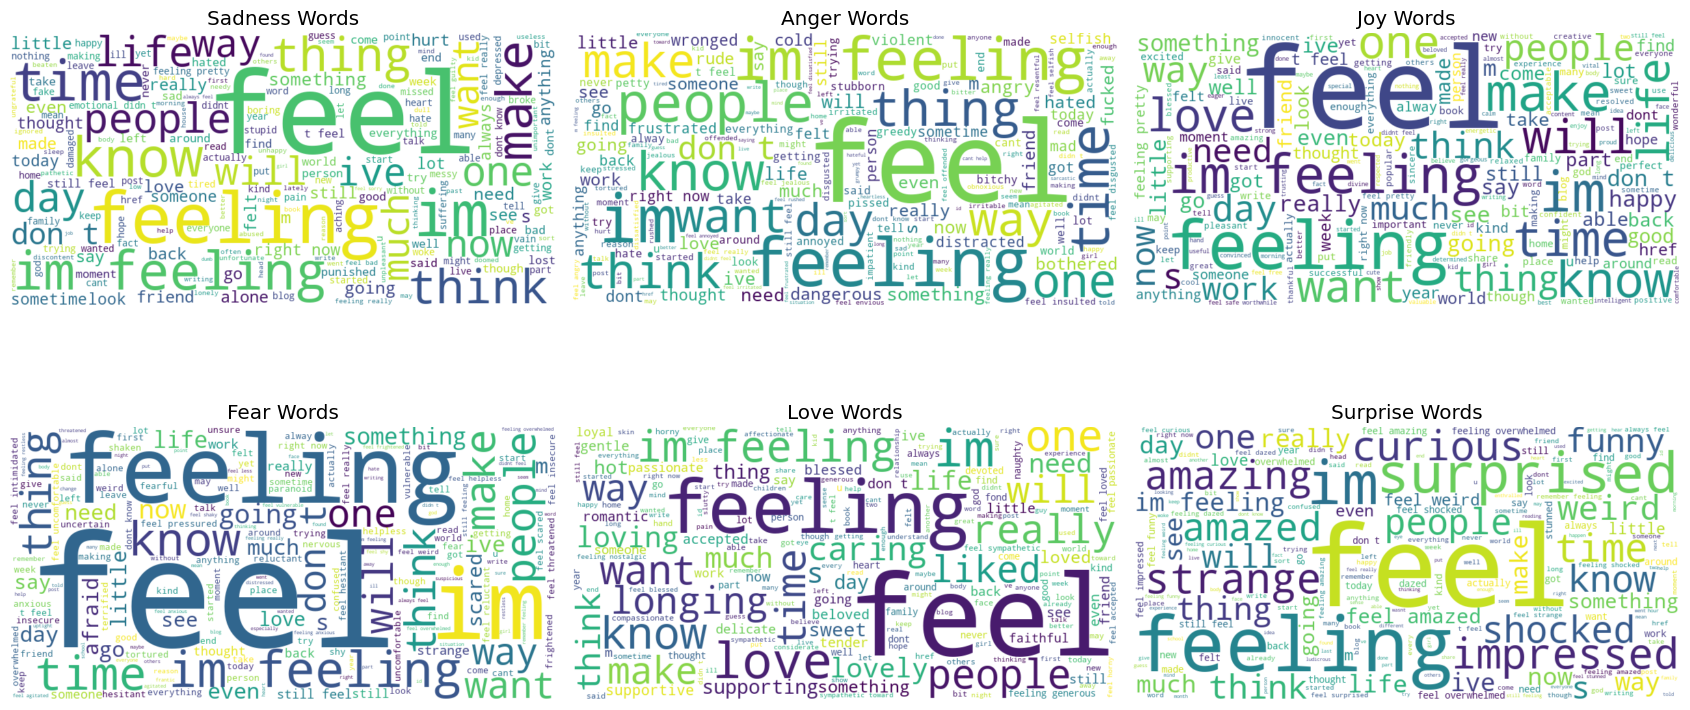

In [43]:
plt.figure(figsize=(17,9))

plt.subplot(2,3,1)
plt.imshow(sadness_wordcloud, interpolation='bilinear')
plt.title('Sadness Words')
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(anger_wordcloud, interpolation='bilinear')
plt.title('Anger Words')
plt.axis('off')


plt.subplot(2,3,3)
plt.imshow(joy_wordcloud, interpolation='bilinear')
plt.title('Joy Words')
plt.axis('off')


plt.subplot(2,3,4)
plt.imshow(fear_wordcloud, interpolation='bilinear')
plt.title('Fear Words')
plt.axis('off')


plt.subplot(2,3,5)
plt.imshow(love_wordcloud, interpolation='bilinear')
plt.title('Love Words')
plt.axis('off')


plt.subplot(2,3,6)
plt.imshow(surprise_wordcloud, interpolation='bilinear')
plt.title('Surprise Words')
plt.axis('off')

plt.tight_layout()
plt.show()

## Text Preprocessing

In [44]:
#Run this to install the data needed from nltk
#utils.nltk_data_download()
df = utils.preprocess_dataframe(df, 'text')

In [45]:
df.head()

,text,label,sentiments,text_length
0,feel really helpless heavy hearted,4,fear,45
1,ive enjoy able slouch relax unwind frankly nee...,0,sadness,234
2,give internship dmrg feel distraught,4,fear,63
3,dont know feel lose,0,sadness,26
4,kindergarten teacher thoroughly weary job take...,4,fear,222


In [46]:
df.drop(columns=['sentiments', 'text_length'],axis=1, inplace=True)
df.head()

,text,label
0,feel really helpless heavy hearted,4
1,ive enjoy able slouch relax unwind frankly nee...,0
2,give internship dmrg feel distraught,4
3,dont know feel lose,0
4,kindergarten teacher thoroughly weary job take...,4


In [47]:
df.to_csv('./preprocessed_data.csv', index=False)